In [29]:
#importing libraries
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import matplotlib as mpl
import time
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.cross_validation import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
%matplotlib inline

In [30]:
#importing files in pandas dataframe
train = pd.read_csv('train.csv',header=0)
test = pd.read_csv('test.csv',header = 0)
labels = train['label']
train.drop('label',axis=1, inplace =True)
#test shape =(28000,784), train shape =(42000,784), labels shape = (42000,1)

In [35]:
#Converting dataframes into numpy arrays
train = train.as_matrix()
test = test.as_matrix()
labels = labels.as_matrix()

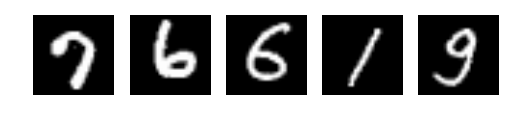

Labels: [7, 6, 6, 1, 9]


In [36]:
#Visualization of few random hand written digits
fig = plt.figure()
randLabels = []
for i in range(1,6):
    k = random.randrange(0,42000,10)
    ax = fig.add_subplot(1,5,i)
    ax.imshow(train[k,:].reshape(28,28),'gray')
    ax.axis('off')
    randLabels.append(labels[k])
plt.show()
print('Labels: {}'.format(randLabels))

In [37]:
#Splitting training dataset into cross-validation dataset(Using normal splitting instead of 5 fold cross validation)
train, valid, labels, validLabels = train_test_split(train, labels, test_size = 0.25)
#Checking sizes of training and validation datasets
print(np.shape(train))
print(np.shape(valid))
print(np.shape(labels))
print(np.shape(validLabels))

(31500, 784)
(10500, 784)
(31500,)
(10500,)


In [38]:
#PreProcessing(Data Compression)
pca = PCA()
pca.fit(train)
VarianceRatio = pca.explained_variance_ratio_

In [39]:
#Finding number of principal components
#Retaining 85% of total variance 
TotVar = 0 
for idx, Var in enumerate(VarianceRatio):
    TotVar += Var 
    if(TotVar>=0.85): 
        break 
print('Total Retained Variance: {}'.format(TotVar)) 
print('Number of principal components {}'.format(idx))

Total Retained Variance: 0.8509447525350505
Number of principal components 58


In [40]:
#Again fitting pca for 153 principal components
pcaRed = PCA(n_components = 58)
pcaRed.fit(train)
#Compressing training and testing data using fitted data
train = pcaRed.fit_transform(train)
test = pcaRed.fit_transform(test)
valid = pcaRed.fit_transform(valid)

In [28]:
#Trying SVM classifier
clf =SVC(C=1000)
t0 = time.time()
clf.fit(train, labels)
TrainPred = clf.predict(train)
TrainScore = accuracy_score(labels,TrainPred)
ValidPred = clf.predict(valid)
ValidScore = accuracy_score(validLabels,ValidPred)
t1 = time.time()
print('Training and cross-validation accuracy are : {} and {}'.format(TrainScore, ValidScore ))
print('Total training and cross-validation accuracy calculation time: {}'.format(np.abs(t1-t0)))

Training and cross-validation accuracy are : 1.0 and 0.11419047619047619
Total training and cross-validation accuracy calculation time: 1321.326274394989


In [66]:
#classifier is predicting all samples as 1, 
#as train dataset is particularly skewed towards label '1' with '3496' samples, max of other labels
#therefore more tuning needs to be done as classifier is poorly tuned
print(TrainPred)
print(ValidPred)

[1 1 1 ..., 1 1 1]
[1 1 1 ..., 1 1 1]


In [41]:
#using classifier to predict test images on public leader board
pred = clf.predict(test)
dfPred = pd.read_csv('sample_submission.csv',header=0)
dfPred['Label']= pd.DataFrame(pred)
dfPred.to_csv('mySubmission.csv', index=False)